In [2]:
# to use standard python modules, you import them
import math

# in order to use ROOT, you import ROOT
# import ROOT

In [3]:
# let's create a one-dimensional histogram with 10 bins in x, covering -5 to 5.
h = ROOT.TH1F("randomnumbers", "My random numbers", 10, -5, 5)

In [4]:
# now let's make a pseudo-random number generator and have it generate numbers following a normal distribution
prng = ROOT.TRandom3(123) # 123 is the seed which sets the initial state of the prng
print("test")
for i in range(10):
    print("Number %d: %f" % (i, prng.Gaus()))

test
Number 0: -0.254411
Number 1: -0.186279
Number 2: -0.143058
Number 3: 0.381770
Number 4: -0.854296
Number 5: -0.160676
Number 6: -0.159359
Number 7: -2.249791
Number 8: -1.279902
Number 9: -0.197965


In [5]:
#Now fill the histogram we just made with random numbers: 
for i in range(100000):
    h.Fill(prng.Gaus())

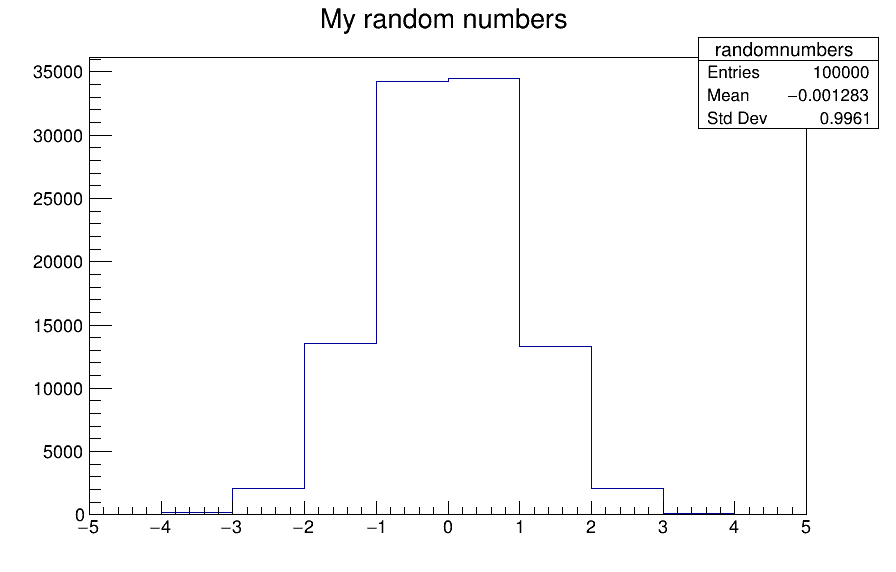

In [6]:
#To draw the histogram we need to define a canvas etc.
c1 = ROOT.TCanvas("c1","c1",900,600)
h.Draw()
c1.Draw()

In [8]:
h_pois = ROOT.TH1F("poisson", "Poissonian numbers", 50, 0, 50)
h_land = ROOT.TH1F("landau", "Landau numbers", 100, 0, 20)

Warning in <TROOT::Append>: Replacing existing TH1: poisson (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: landau (Potential memory leak).


In [10]:
pois_lambda = 15
for i in range(100000):
    h_pois.Fill(prng.Poisson(pois_lambda))

In [12]:
landau_mpv, landau_sigma = 5,1
for i in range(100000):
    h_land.Fill(prng.Landau(landau_mpv, landau_sigma))

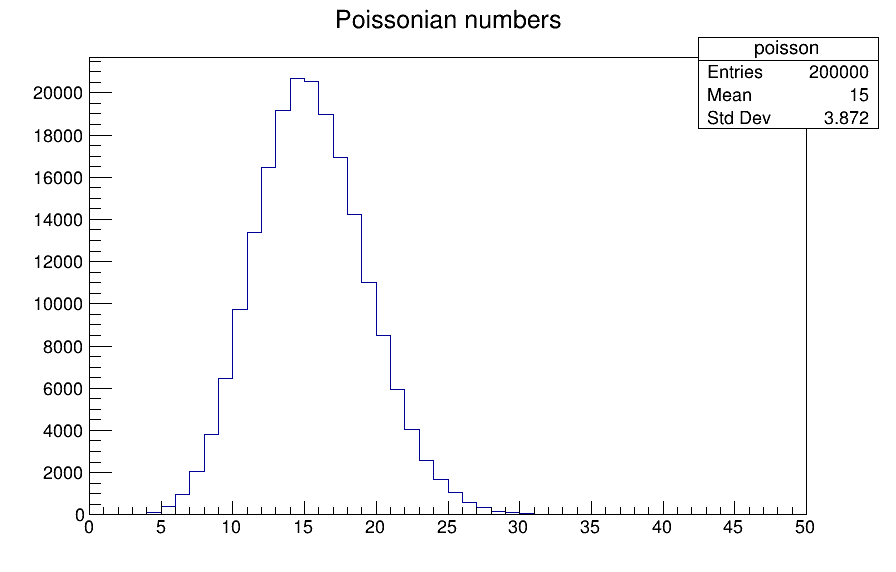

In [13]:
#To draw the histogram we need to define a canvas etc.
c2 = ROOT.TCanvas("c2","c2",900,600)
h_pois.Draw()
c2.Draw()

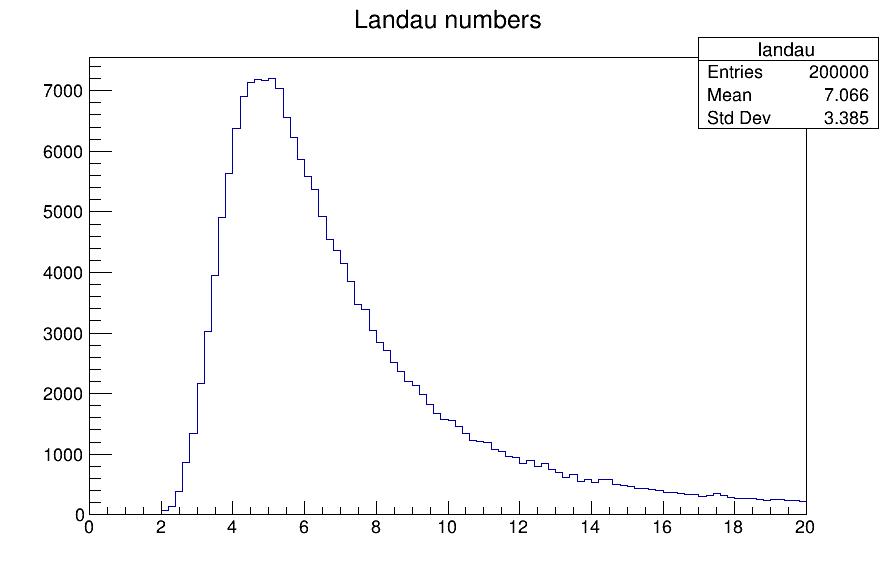

In [14]:
c3 = ROOT.TCanvas("c3","c3",900,600)
h_land.Draw()
c3.Draw()


In [15]:
#combine distributions and graphs

h_exp = ROOT.TH1F("exponential", "Exponential combined distribution", 100, 0, 250)
h_exp_low = ROOT.TH1F("exp_low", "Exponential low distribution", 100, 0, 250)
h_exp_high = ROOT.TH1F("exp_high", "Exponential high distribution", 100, 0, 250)

exp_tau_high = 50
exp_tau_low  = 14



In [16]:
prob_of_low = 0.00345 / (1-0.00345)

In [18]:
for i in range(1000000):
    if prng.Rndm() > prob_of_low:
        low_exp = prng.Exp(exp_tau_low)
        h_exp.Fill(prng.Exp(exp_tau_low))
        h_exp_low.Fill(low_exp)
    else:
        high_exp = prng.Exp(exp_tau_high)
        h_exp.Fill(high_exp)
        h_exp_high.Fill(high_exp)

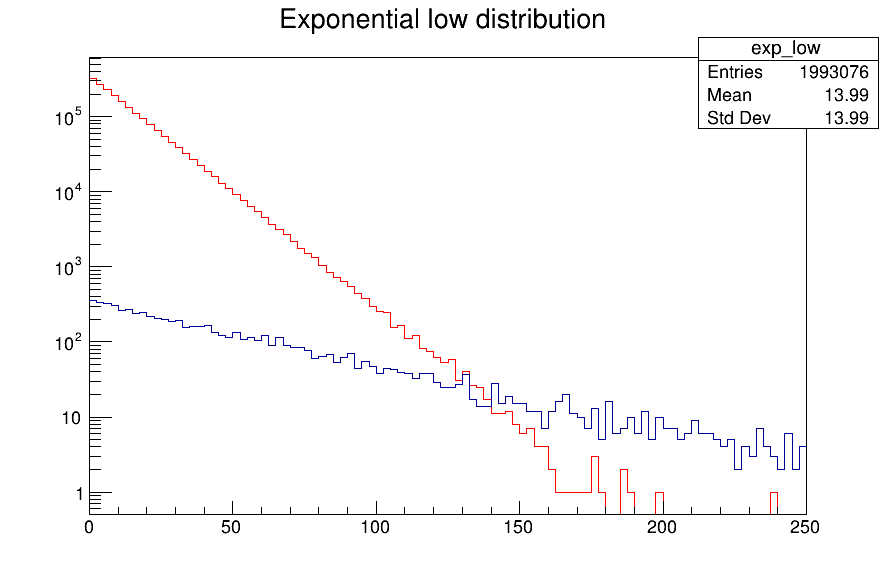

In [19]:
bc4 = ROOT.TCanvas("c4","c4",900,600)
c4.SetLogy()
h_exp_low.Draw()
h_exp_high.Draw("SAME")
h_exp_low.SetLineColor(2)
c4.Draw()

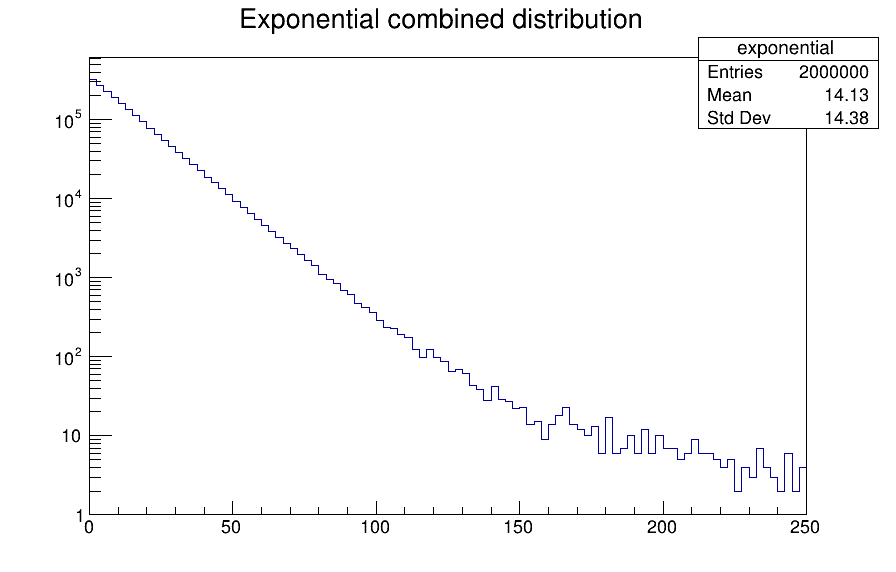

In [20]:
c5 = ROOT.TCanvas("c5","c5",900,600)
h_exp.Draw()
c5.SetLogy()
c5.Draw()

In [21]:
h_exp.Fit("dexp", "R")

Unknown function: dexp


Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResu